**PASO 1. CARGAR LIBRERIAS**

In [1]:
from scipy.stats import shapiro, kstest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**PAS0 2. CARGAR DATOS**

In [2]:
datos = pd.read_csv("/content/drive/MyDrive/curso-est/corte-2/datos/datos_trabajadores.csv")
datos.head()

,altura,peso,ingreso,horas_trabajadas,ausencias
0,134.433878,70.617864,9973.577534,40.905476,4
1,167.158746,109.268295,8961.047249,41.576483,4
2,141.480812,81.034644,7437.977263,41.369239,5
3,123.227119,57.884172,12064.915290,41.537211,3
4,143.554951,93.581093,9296.396167,40.441203,4


**PASO 3. COMPROBAR SUPUESTOS DE NORMALIDAD**

**EXPLORAR LAS VARIABLES GRÁFICAMENTE**

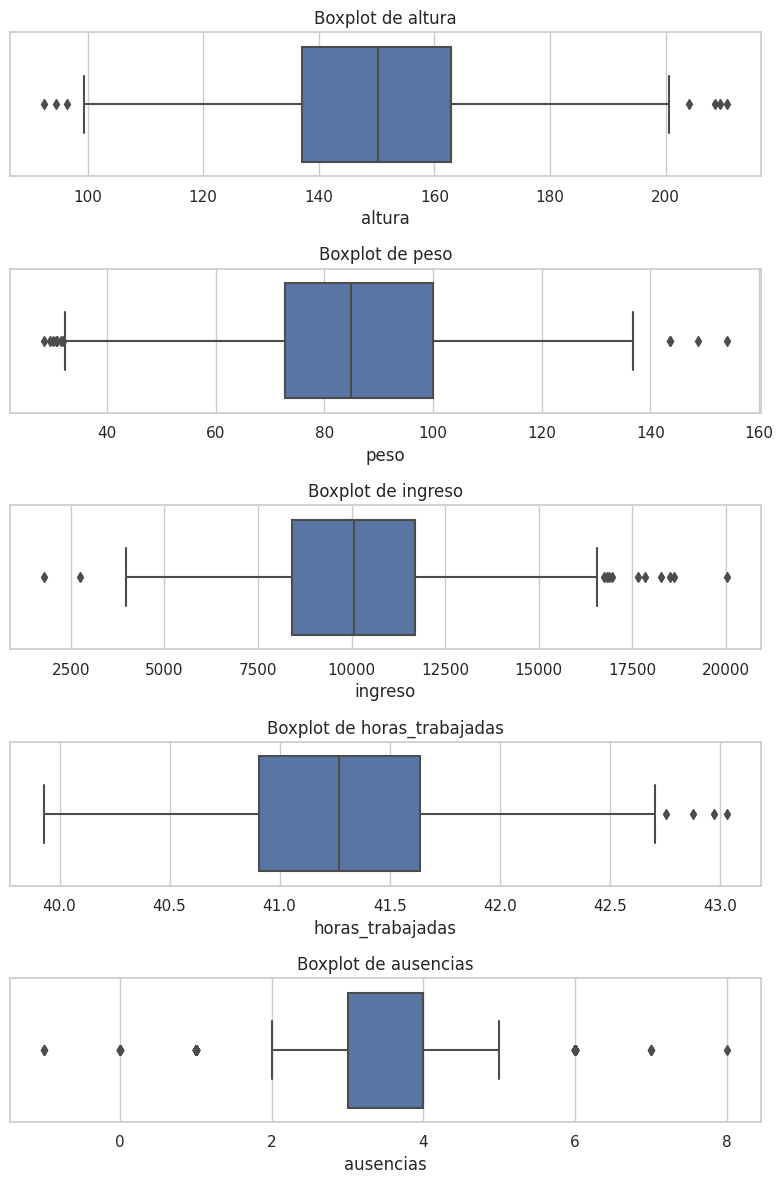

In [3]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(datos.columns), 1, figsize=(8, 12), sharex=False)
for i, column in enumerate(datos.columns):
    sns.boxplot(x=datos[column], ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

**SHAPIRO**


In [4]:
shapiro_p_values = []
variables = []
for column in datos.columns:
    data = datos[column].dropna()  # Eliminar valores nulos si los hay
    shapiro_stat, shapiro_p = shapiro(data)
    shapiro_p_values.append(shapiro_p)
    variables.append(column)
shapiro_results_df = pd.DataFrame({'Variable': variables,'p-value': shapiro_p_values})
shapiro_results_df= shapiro_results_df.round(4)
shapiro_results_df

,Variable,p-value
0,altura,0.6752
1,peso,0.0940
2,ingreso,0.0112
3,horas_trabajadas,0.0933
4,ausencias,0.0000


**KOLMOGOROV**

In [5]:
ks_p_values = []
variables = []
for column in datos.columns:
    data = datos[column].dropna()  # Eliminar valores nulos si los hay
    ks_stat, ks_p = kstest(data, 'norm', args=(data.mean(), data.std()))
    ks_p_values.append(ks_p)
    variables.append(column)
ks_results_df = pd.DataFrame({'Variable': variables,'p-value': ks_p_values})
ks_results_df= ks_results_df.round(4)
ks_results_df

,Variable,p-value
0,altura,0.9323
1,peso,0.5136
2,ingreso,0.8006
3,horas_trabajadas,0.9311
4,ausencias,0.0000


**PASO 4. APLICAR EL MÈTODO ESTADÌSTICO DE CORRELACIÓN**

**EXPLORAR GRÁFICAMENTE**

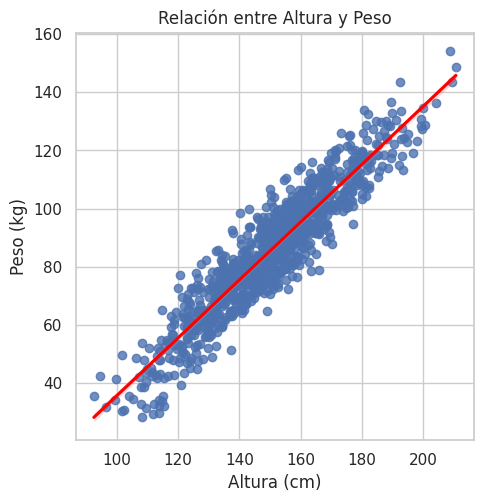

In [6]:
lm = sns.lmplot(x="altura", y="peso", data=datos, height=5, aspect=1,
                line_kws={'color': 'red'})  # Para cambiar el color de la línea a rojo
lm.set_axis_labels("Altura (cm)", "Peso (kg)")  # Agregar unidades de medida
plt.title("Relación entre Altura y Peso")  # Título descriptivo
for ax in lm.axes.flat:
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
plt.show()

**PRUEBA DE PEARSON**

In [7]:
corr_coeff, p_value = pearsonr(datos['altura'], datos['peso'])
corr_coeff = round(corr_coeff, 4)
p_value = round(p_value, 4)
print(f"Coeficiente de correlación de Pearson: {corr_coeff}")
print(f"Valor p: {p_value}")

Coeficiente de correlación de Pearson: 0.9306
Valor p: 0.0


**PRUEBA DE SPEARMAN**

In [8]:
corr_coeff, p_value = spearmanr(datos['altura'], datos['peso'])
corr_coeff = round(corr_coeff, 4)
p_value = round(p_value, 4)
print(f"Coeficiente de correlación de Pearson: {corr_coeff}")
print(f"Valor p: {p_value}")

Coeficiente de correlación de Pearson: 0.9223
Valor p: 0.0


**ANÀLISIS DE ASOCIACIÓN ENTRE MULTIPLES VARIABLES**

**EXPLORAR GRÁFICAMENTE**

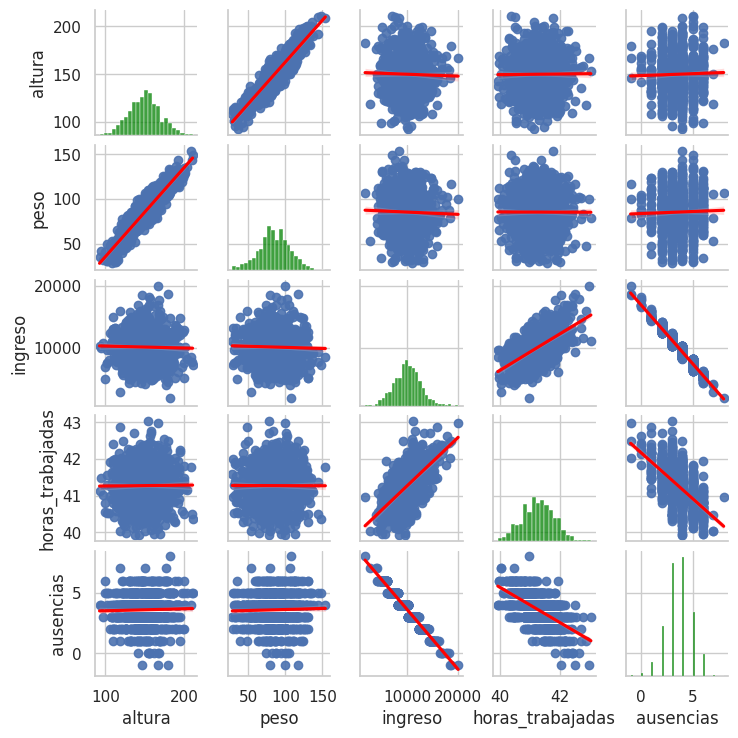

In [9]:
sns.pairplot(datos, diag_kws={'color':'green'}, plot_kws={'scatter_kws':{'alpha':0.9},
            'line_kws':{'color':'red'}},kind='reg', height=1.5)
plt.show()

**PRUEBA DE PEARSON**

In [10]:
datos.corr()

,altura,peso,ingreso,horas_trabajadas,ausencias
altura,1.000000,0.930608,-0.025283,0.008547,0.025587
peso,0.930608,1.000000,-0.029852,-0.002483,0.027450
ingreso,-0.025283,-0.029852,1.000000,0.625514,-0.973104
horas_trabajadas,0.008547,-0.002483,0.625514,1.000000,-0.603870
ausencias,0.025587,0.027450,-0.973104,-0.603870,1.000000


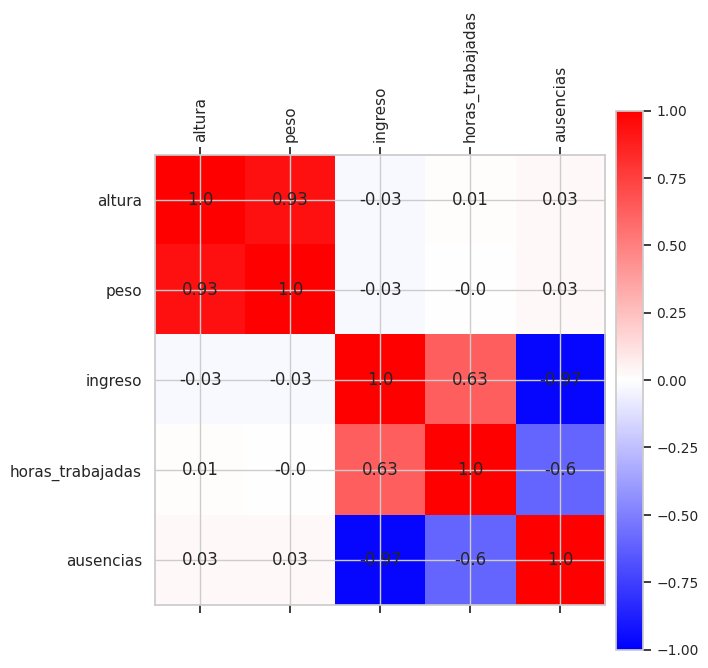

In [11]:
matriz = datos.corr()
fig, ax = plt.subplots(figsize=(7 , 7))
im = ax.matshow(matriz, cmap = "bwr", vmin=-1,vmax=1)
plt.xticks(range(datos.shape[1]), datos.columns, rotation=90)
plt.yticks(range(datos.shape[1]), datos.columns)
for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
        ax.text(i, j, round(matriz.iloc[i, j], 2),
                 ha="center", va="center")
cbar = fig.colorbar(im, pad=0.02)
cbar.ax.tick_params(labelsize=10)
plt.show()

**PRUEBA DE SPEARMAN**

In [12]:
datos.corr("spearman")

,altura,peso,ingreso,horas_trabajadas,ausencias
altura,1.000000,0.922263,-0.026392,0.001326,0.025961
peso,0.922263,1.000000,-0.030705,-0.003216,0.027707
ingreso,-0.026392,-0.030705,1.000000,0.617261,-0.969201
horas_trabajadas,0.001326,-0.003216,0.617261,1.000000,-0.594149
ausencias,0.025961,0.027707,-0.969201,-0.594149,1.000000


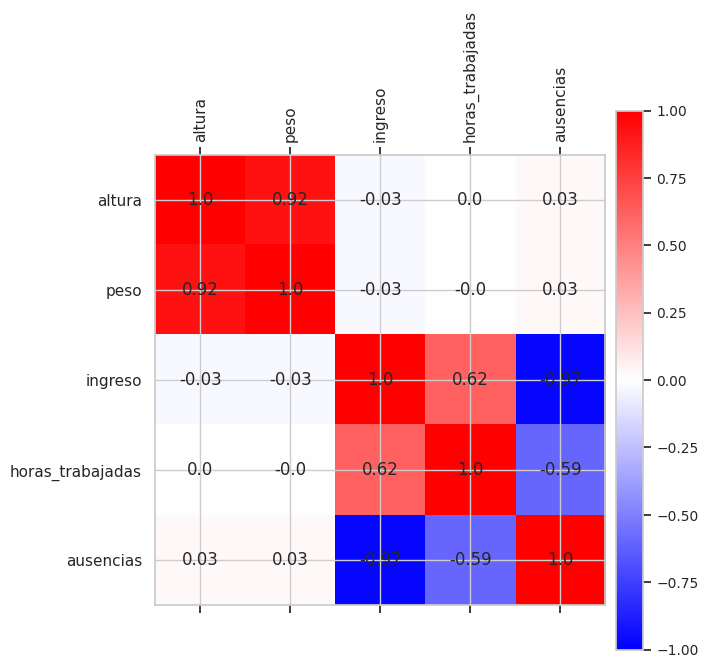

In [13]:
matriz = datos.corr("spearman")
fig, ax = plt.subplots(figsize=(7 , 7))
im = ax.matshow(matriz, cmap = "bwr", vmin=-1,vmax=1)
plt.xticks(range(datos.shape[1]), datos.columns, rotation=90)
plt.yticks(range(datos.shape[1]), datos.columns)
for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
        ax.text(i, j, round(matriz.iloc[i, j], 2),
                 ha="center", va="center")
cbar = fig.colorbar(im, pad=0.02)
cbar.ax.tick_params(labelsize=10)
plt.show()